#Penugasan

analisa penjualan setiap minggu dari produk kalian ---> julanh penjualan setiap bulan

visualisasi pendapatan tertinggi setiap bulannya. hitung total pendapatan produk setiap bulan --> list, {"januari": 2000; "Februari: 300} --visualisasikan

kasih legenda setiap visualiasi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_jualan = pd.read_excel("data_penjualan-Copy.xlsx")
data_jualan

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak260,1000.0,1800.0,1800000.0
1,05/08/2022,FoodpakMatte245,1000.0,1900.0,1900000.0
2,05/08/2022,CraftLaminasi290,5000.0,750.0,3750000.0
3,05/08/2022,CraftLaminasi290,1000.0,1200.0,1200000.0
4,07/08/2022,Dupleks310,1000.0,1550.0,1550000.0
...,...,...,...,...,...
1071,14/11/2023,Ivory230,1000.0,900.0,900000.0
1072,15/11/2023,CraftLaminasi290,2000.0,800.0,1600000.0
1073,15/11/2023,CraftLaminasi290,1500.0,875.0,1312500.0
1074,15/11/2023,FoodpakMatte,1000.0,2200.0,2200000.0


In [9]:
data_craft = data_jualan[data_jualan['Jenis Produk'] == 'CraftLaminasi290']
data_craft["Tanggal"] = pd.to_datetime(data_craft["Tanggal"], format="%d/%m/%Y")
data_craft["Bulan"] = data_craft["Tanggal"].dt.month_name()
data_craft

C:\Users\Asus\AppData\Local\Temp\ipykernel_23272\3936933741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_craft["Tanggal"] = pd.to_datetime(data_craft["Tanggal"], format="%d/%m/%Y")
C:\Users\Asus\AppData\Local\Temp\ipykernel_23272\3936933741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_craft["Bulan"] = data_craft["Tanggal"].dt.month_name()


,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Bulan
2,2022-08-05,CraftLaminasi290,5000.0,750.0,3750000.0,August
3,2022-08-05,CraftLaminasi290,1000.0,1200.0,1200000.0,August
13,2022-08-11,CraftLaminasi290,1000.0,NaN,850000.0,August
20,2022-08-12,CraftLaminasi290,3000.0,NaN,2400000.0,August
21,2022-08-12,CraftLaminasi290,500.0,600.0,300000.0,August
...,...,...,...,...,...,...
1022,2023-10-28,CraftLaminasi290,1000.0,875.0,875000.0,October
1023,2023-10-28,CraftLaminasi290,1000.0,850.0,850000.0,October
1053,2023-11-09,CraftLaminasi290,2000.0,1600.0,3200000.0,November
1072,2023-11-15,CraftLaminasi290,2000.0,800.0,1600000.0,November


In [29]:
penjualan_bulanan = data_craft.groupby("Bulan").agg(
    jumlah_penjualan=('Jumlah Order', "sum"),
    total_pendapatan =("Total", "sum")).reindex(["January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"])
penjualan_bulanan

,jumlah_penjualan,total_pendapatan
Bulan,,
January,22500.0,28875000.0
February,20000.0,17800000.0
March,16000.0,19450000.0
April,21000.0,21200000.0
May,9000.0,10200000.0
June,12000.0,13025000.0
July,13000.0,14400000.0
August,35000.0,32887500.0
September,44000.0,54962500.0


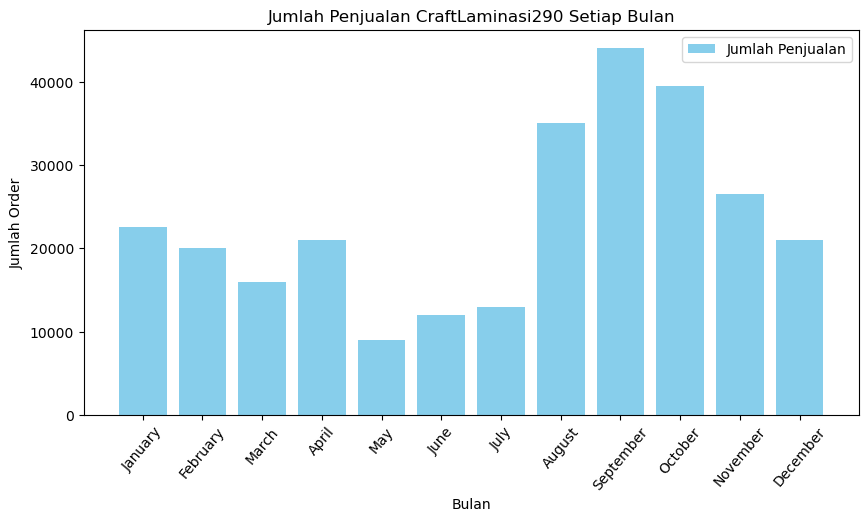

In [35]:
plt.figure(figsize=(10,5))
plt.bar(penjualan_bulanan.index, penjualan_bulanan["jumlah_penjualan"], label="Jumlah Penjualan", color="skyblue")
plt.title("Jumlah Penjualan CraftLaminasi290 Setiap Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Order")
plt.xticks(rotation=50)
plt.legend()
plt.show()